In [1]:
import pandas as pd
import requests
from bs4 import  BeautifulSoup

In [2]:
header = {'User-Agent' : 'Mozilla/5.0 (Windows NT 6.3; win64; x64) AppleWebkit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
webpage = requests.get('https://www.ambitionbox.com/list-of-companies?page=1', headers = header).text

In [3]:
soup = BeautifulSoup(webpage, 'lxml')

<!DOCTYPE html>
<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-n-head-ssr="" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width,initial-scale=1,minimum-scale=1" name="viewport"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <link href="/assets/next/manifest.json" rel="manifest"/>
  <style>
   @media only screen and (min-width:767px){.trp-img{width:400px!important;max-width:400px!important}}
  </style>
  <script src="/static/js/env-runtime.js">
  </script>
  <script>
   window.dataLayer=window.dataLayer||[],window.gtag=window.gtag||function(){window.dataLayer.push(arguments)},gtag("js",new Date),window.initialDate=(new Date).toISOString()
  </script>
  <title>
   Companies in India | AmbitionBox
  </title>
  <meta content="2025 AmbitionBox" data-n-head="ssr" name="copyright"/>
  <meta content="1 day" data-n-head="ssr" name="revisit-after"/>
  <meta content="AmbitionBox" data-n-head="ssr" name="application-name"/>
  <meta co
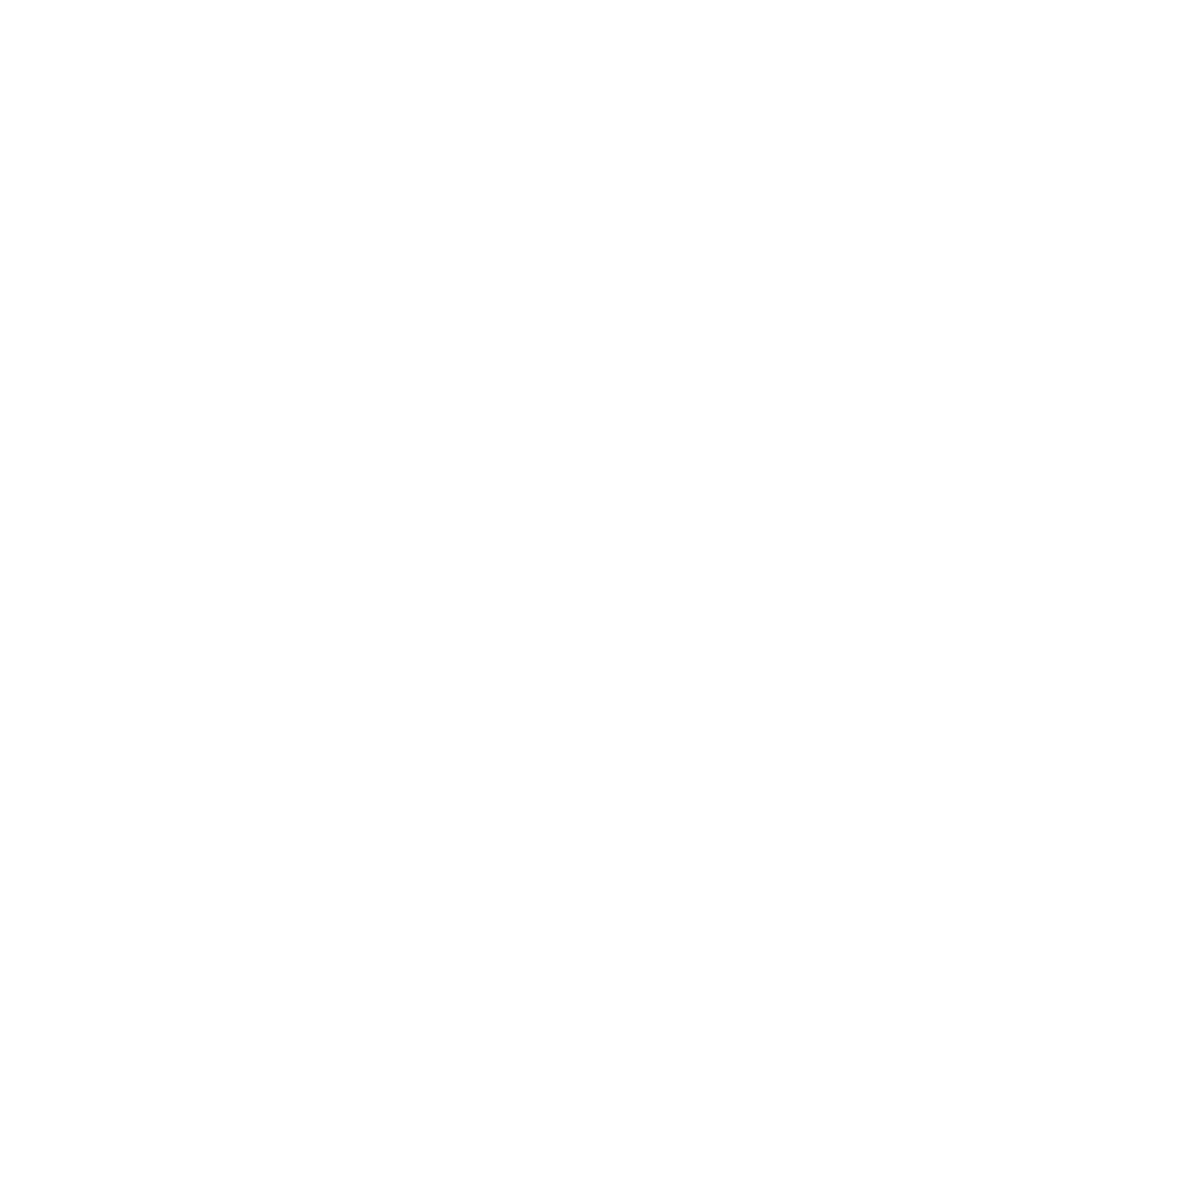

In [4]:
print(soup.prettify())

In [5]:
soup.find_all('h1')[0].text.strip() # find all tag in whole webpage

'Companies in India'

In [6]:
for i in soup.find_all('h2'):
    print(i.text.strip())


TCS
Accenture
Wipro
Cognizant
Capgemini
HDFC Bank
Infosys
ICICI Bank
HCLTech
Tech Mahindra
Genpact
Teleperformance
Concentrix Corporation
Axis Bank
Amazon
Jio
iEnergizer
Reliance Retail
IBM
LTIMindtree
Companies by Industry
Companies by Locations
Companies by Type


In [7]:
len(soup.find_all('div', class_='rating_text')[0])

1

In [49]:
company = soup.find_all('div', class_='companyCardWrapper')

In [50]:
len(company)

20

In [88]:
name = []
rating = []
reviews = []
Highly_rated_for = []
Critically_rated_for = []
Description_and_location = []

for i in company:
    name.append(i.find('h2').text.strip())
    rating.append(i.find_all('div', class_='rating_text')[0].text.strip())
    reviews.append(i.find('span', class_= 'companyCardWrapper__companyRatingCount').text.strip())
    Highly_rated_for.append(i.find('span', class_= 'companyCardWrapper__ratingValues').text.strip())
    Description_and_location.append(i.find('span', class_='companyCardWrapper__interLinking').text.strip())

d = {"Name" : name, 'Rating' : rating, 'Reviews' : reviews, 'Culture' : Highly_rated_for, 'About' : Description_and_location}

df = pd.DataFrame(d)

In [69]:
name

['TCS',
 'Accenture',
 'Wipro',
 'Cognizant',
 'Capgemini',
 'HDFC Bank',
 'Infosys',
 'ICICI Bank',
 'HCLTech',
 'Tech Mahindra',
 'Genpact',
 'Teleperformance',
 'Concentrix Corporation',
 'Axis Bank',
 'Amazon',
 'Jio',
 'iEnergizer',
 'Reliance Retail',
 'IBM',
 'LTIMindtree']

In [53]:
rating 

['3.6',
 '3.7',
 '3.7',
 '3.7',
 '3.7',
 '3.8',
 '3.6',
 '4.0',
 '3.5',
 '3.5',
 '3.7',
 '3.9',
 '3.7',
 '3.7',
 '4.0',
 '4.1',
 '4.7',
 '3.9',
 '3.9',
 '3.7']

In [54]:
reviews

['(99.8k)',
 '(64.3k)',
 '(58k)',
 '(55.1k)',
 '(46.8k)',
 '(44.3k)',
 '(43.5k)',
 '(42.5k)',
 '(40.2k)',
 '(38.6k)',
 '(36.5k)',
 '(33.1k)',
 '(28.8k)',
 '(28.7k)',
 '(27.6k)',
 '(26.4k)',
 '(25.1k)',
 '(24.5k)',
 '(23.7k)',
 '(23k)']

In [77]:
Highly_rated_for

['Job Security, Work Life Balance',
 'Promotions / Appraisal, Salary & Benefits, Work Satisfaction',
 'Job Security',
 'Promotions / Appraisal, Salary & Benefits, Work Satisfaction',
 'Work Life Balance, Job Security',
 'Job Security, Skill Development / Learning',
 'Job Security',
 'Job Security, Skill Development / Learning, Company Culture',
 'Job Security',
 'Promotions / Appraisal, Salary & Benefits, Work Satisfaction',
 'Job Security',
 'Company Culture, Work Life Balance, Job Security',
 'Job Security',
 'Promotions / Appraisal, Work Satisfaction',
 'Company Culture, Work Life Balance, Salary & Benefits',
 'Job Security, Skill Development / Learning, Company Culture',
 'Salary & Benefits, Company Culture, Work Life Balance',
 'Skill Development / Learning, Job Security',
 'Work Life Balance, Company Culture, Job Security',
 'Promotions / Appraisal, Salary & Benefits']

In [87]:
Description_and_location

['IT Services & Consulting | Bangalore / Bengaluru +412 other locations',
 'IT Services & Consulting | Bangalore / Bengaluru +228 other locations',
 'IT Services & Consulting | Bangalore / Bengaluru +357 other locations',
 'IT Services & Consulting | Hyderabad / Secunderabad +212 other locations',
 'IT Services & Consulting | Bangalore / Bengaluru +175 other locations',
 'Banking | Mumbai +1713 other locations',
 'IT Services & Consulting | Bangalore / Bengaluru +230 other locations',
 'Banking | Mumbai +1403 other locations',
 'IT Services & Consulting | Chennai +217 other locations',
 'IT Services & Consulting | Hyderabad / Secunderabad +321 other locations',
 'IT Services & Consulting | Hyderabad / Secunderabad +162 other locations',
 'BPO | Mumbai +246 other locations',
 'BPO | Bangalore / Bengaluru +168 other locations',
 'Banking | Mumbai +1436 other locations',
 'Internet | Bangalore / Bengaluru +500 other locations',
 'Telecom | Mumbai +1546 other locations',
 'BPO | Noida +45 

In [89]:
df

,Name,Rating,Reviews,Culture,About
0,TCS,3.6,(99.8k),"Job Security, Work Life Balance",IT Services & Consulting | Bangalore / Bengalu...
1,Accenture,3.7,(64.3k),"Promotions / Appraisal, Salary & Benefits, Wor...",IT Services & Consulting | Bangalore / Bengalu...
2,Wipro,3.7,(58k),Job Security,IT Services & Consulting | Bangalore / Bengalu...
3,Cognizant,3.7,(55.1k),"Promotions / Appraisal, Salary & Benefits, Wor...",IT Services & Consulting | Hyderabad / Secunde...
4,Capgemini,3.7,(46.8k),"Work Life Balance, Job Security",IT Services & Consulting | Bangalore / Bengalu...
5,HDFC Bank,3.8,(44.3k),"Job Security, Skill Development / Learning",Banking | Mumbai +1713 other locations
6,Infosys,3.6,(43.5k),Job Security,IT Services & Consulting | Bangalore / Bengalu...
7,ICICI Bank,4.0,(42.5k),"Job Security, Skill Development / Learning, Co...",Banking | Mumbai +1403 other locations
8,HCLTech,3.5,(40.2k),Job Security,IT Services & Consulting | Chennai +217 other ...
9,Tech Mahindra,3.5,(38.6k),"Promotions / Appraisal, Salary & Benefits, Wor...",IT Services & Consulting | Hyderabad / Secunde...


In [109]:
Final_Data = pd.DataFrame()
dfs_list = []

for j in range(1,400):
    url = 'https://www.ambitionbox.com/list-of-companies?page={}'.format(j)
    header = {'User-Agent' : 'Mozilla/5.0 (Windows NT 6.3; win64; x64) AppleWebkit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
    webpage = requests.get(url, headers = header).text
    soup = BeautifulSoup(webpage, 'lxml')
    company = soup.find_all('div', class_='companyCardWrapper')
    name = []
    rating = []
    reviews = []
    Highly_rated_for = []
    Description_and_location = []
    
    for i in company:
        try:
            name.append(i.find('h2').text.strip())
        except:
            name.append(None)
        try:
            rating.append(i.find_all('div', class_='rating_text')[0].text.strip())
        except:
            rating.append(None)
        try:
            reviews.append(i.find('span', class_= 'companyCardWrapper__companyRatingCount').text.strip())
        except:
            reviews.append(None)
        try:
            Highly_rated_for.append(i.find('span', class_= 'companyCardWrapper__ratingValues').text.strip())
        except:
            Highly_rated_for.append(None)
        try:
            Description_and_location.append(i.find('span', class_='companyCardWrapper__interLinking').text.strip())
        except:
            Description_and_location.append(None)
    dic = {"Name" : name, 
           'Rating' : rating, 
           'Reviews' : reviews, 
           'Culture' : Highly_rated_for, 
           'About' : Description_and_location}
    
    df = pd.DataFrame(dic)
    
    dfs_list.append(df)
    Final_Data = pd.concat(dfs_list, ignore_index=True)
    
print("Done")

Done


In [113]:
Final_Data

,Name,Rating,Reviews,Culture,About
0,TCS,3.6,(99.8k),"Job Security, Work Life Balance",IT Services & Consulting | Bangalore / Bengalu...
1,Accenture,3.7,(64.3k),"Promotions / Appraisal, Salary & Benefits, Wor...",IT Services & Consulting | Bangalore / Bengalu...
2,Wipro,3.7,(58k),Job Security,IT Services & Consulting | Bangalore / Bengalu...
3,Cognizant,3.7,(55.1k),"Promotions / Appraisal, Salary & Benefits, Wor...",IT Services & Consulting | Hyderabad / Secunde...
4,Capgemini,3.7,(46.8k),"Work Life Balance, Job Security",IT Services & Consulting | Bangalore / Bengalu...
...,...,...,...,...,...
7975,Csc Computer Education,4.2,(121),"Skill Development / Learning, Job Security, Wo...",Education & Training | Chennai +42 other locat...
7976,G.S.E.C,3.5,(120),"Job Security, Promotions / Appraisal, Company ...",Logistics | Ahmedabad +14 other locations
7977,O2 Power,4.6,(121),"Company Culture, Work Satisfaction, Job Security",Gurgaon / Gurugram +27 other locations
7978,Growisto,4.3,(120),"Company Culture, Skill Development / Learning,...",Marketing & Advertising | Mumbai +2 other loca...


In [111]:
Final_Data.to_csv('Companies_Data.csv', index=False)